In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import json
import os

def create_category_mapping(json_dir):
    category_mapping = {}
    category_counter = 0  # 매핑을 위한 카운터 (0부터 시작)

    # json_dir 내의 모든 JSON 파일에 대해 처리
    for file_name in os.listdir(json_dir):
        if file_name.endswith('.json'):
            file_path = os.path.join(json_dir, file_name)

            # JSON 파일 열기
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)

            # categories에서 category_id와 name을 추출하여 매핑 생성
            for category in data.get('categories', []):
                category_id = category['id']
                category_name = category['name']

                # category_id가 이미 매핑되어 있지 않다면 추가
                if category_id not in category_mapping:
                    category_mapping[category_id] = category_counter
                    category_counter += 1

    return category_mapping

# JSON 파일들이 있는 디렉토리 경로
json_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/merged_annotations"

# category_mapping 생성
category_mapping = create_category_mapping(json_dir)

# 결과 출력
print("Category Mapping:")
print(category_mapping)

# 매핑된 category_mapping을 저장하거나 활용할 수 있음

Category Mapping:
{16550: 0, 31704: 1, 1899: 2, 33008: 3, 21025: 4, 16547: 5, 18109: 6, 27925: 7, 29344: 8, 29450: 9, 19606: 10, 21770: 11, 24849: 12, 33207: 13, 44198: 14, 2482: 15, 6191: 16, 4377: 17, 3742: 18, 12777: 19, 19551: 20, 22626: 21, 23222: 22, 5885: 23, 12080: 24, 13394: 25, 22361: 26, 5093: 27, 25437: 28, 3350: 29, 3831: 30, 16231: 31, 16261: 32, 16687: 33, 20237: 34, 21324: 35, 22073: 36, 29666: 37, 35205: 38, 36636: 39, 38161: 40, 13899: 41, 18146: 42, 18356: 43, 19231: 44, 20013: 45, 31862: 46, 32309: 47, 33879: 48, 41767: 49, 3482: 50, 22346: 51, 19860: 52, 28762: 53, 30307: 54, 31884: 55, 34596: 56, 20876: 57, 25366: 58, 25468: 59, 27652: 60, 27732: 61, 27776: 62, 3543: 63, 10220: 64, 4542: 65, 12246: 66, 12419: 67, 23202: 68, 27992: 69, 29870: 70, 33877: 71, 6562: 72}


In [3]:
category_mapping

{16550: 0,
 31704: 1,
 1899: 2,
 33008: 3,
 21025: 4,
 16547: 5,
 18109: 6,
 27925: 7,
 29344: 8,
 29450: 9,
 19606: 10,
 21770: 11,
 24849: 12,
 33207: 13,
 44198: 14,
 2482: 15,
 6191: 16,
 4377: 17,
 3742: 18,
 12777: 19,
 19551: 20,
 22626: 21,
 23222: 22,
 5885: 23,
 12080: 24,
 13394: 25,
 22361: 26,
 5093: 27,
 25437: 28,
 3350: 29,
 3831: 30,
 16231: 31,
 16261: 32,
 16687: 33,
 20237: 34,
 21324: 35,
 22073: 36,
 29666: 37,
 35205: 38,
 36636: 39,
 38161: 40,
 13899: 41,
 18146: 42,
 18356: 43,
 19231: 44,
 20013: 45,
 31862: 46,
 32309: 47,
 33879: 48,
 41767: 49,
 3482: 50,
 22346: 51,
 19860: 52,
 28762: 53,
 30307: 54,
 31884: 55,
 34596: 56,
 20876: 57,
 25366: 58,
 25468: 59,
 27652: 60,
 27732: 61,
 27776: 62,
 3543: 63,
 10220: 64,
 4542: 65,
 12246: 66,
 12419: 67,
 23202: 68,
 27992: 69,
 29870: 70,
 33877: 71,
 6562: 72}

# category_id 0-73 사이로 매핑

In [26]:
import json
import os

def map_category_ids_and_save(json_dir, category_mapping, output_dir):
    # 출력 폴더가 없다면 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # json_dir 내의 모든 JSON 파일에 대해 처리
    for file_name in os.listdir(json_dir):
        if file_name.endswith('.json'):
            file_path = os.path.join(json_dir, file_name)

            # JSON 파일 열기
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)

            # annotations에서 category_id 매핑
            for annotation in data.get('annotations', []):
                original_category_id = annotation['category_id']
                
                # category_mapping을 사용해 새로운 category_id로 변경
                if original_category_id in category_mapping:
                    annotation['category_id'] = category_mapping[original_category_id]
                else:
                    print(f"Warning: category_id {original_category_id} not found in mapping!")

            # 새로운 파일 경로 생성 (원본 파일명에 _mapped 추가)
            output_file_path = os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}.json")

            # 변경된 내용을 새로운 파일에 저장
            with open(output_file_path, 'w', encoding='utf-8') as f:
                json.dump(data, f, ensure_ascii=False, indent=4)

# JSON 파일들이 있는 디렉토리 경로
json_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/merged_annotations"

# 새로 저장될 폴더
output_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/mapped_annotations/"


# category_id 매핑 적용하여 새로 저장
map_category_ids_and_save(json_dir, category_mapping, output_dir)

print("Category ID mapping completed and saved in new files.")


Category ID mapping completed and saved in new files.


# dataset.py

In [ ]:
import os
import torch
import torchvision
import json
from glob import glob
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torchvision import transforms
from PIL import Image

# 데이터셋 클래스 정의
class PillDataset(Dataset):
    def __init__(self, json_dir, img_dir, transforms=None):
        self.json_files = glob(os.path.join(json_dir, "*.json"))  # JSON 파일 리스트
        self.img_dir = img_dir
        self.transforms = transforms
        self.data = self._load_json_files()  # 🔥 여기서 json_dir을 넘기지 않아도 됨

    def _load_json_files(self):
        """JSON 폴더 내 모든 파일을 읽어 통합"""
        all_data = {"images": [], "annotations": [], "categories": []}
        for json_file in self.json_files:
            with open(json_file, "r", encoding="utf-8") as f:
                data = json.load(f)
            all_data["images"].extend(data["images"])
            all_data["annotations"].extend(data["annotations"])
            all_data["categories"].extend(data["categories"])
        return all_data

    def __len__(self):
        return len(self.data["images"])

    def __getitem__(self, idx):
        img_info = self.data["images"][idx]
        img_path = os.path.join(self.img_dir, img_info["file_name"])
        image = Image.open(img_path).convert("RGB")

        # 해당 이미지에 대한 어노테이션 찾기
        image_id = img_info["id"]
        boxes, labels, areas = [], [], []

        for ann in self.data["annotations"]:
            if ann["image_id"] == image_id:
                x_min, y_min, width, height = ann["bbox"]
                boxes.append([x_min, y_min, x_min + width, y_min + height])
                labels.append(ann["category_id"])
                areas.append(ann["area"])

        # 변환 적용 (PyTorch 모델 입력 형태에 맞추기)
        if self.transforms:
            image = self.transforms(image)

        # Faster R-CNN에 맞는 타겟 데이터 구성
        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([image_id]),
            "area": torch.tensor(areas, dtype=torch.float32),
            "iscrowd": torch.zeros((len(boxes),), dtype=torch.int64),  # iscrowd는 0으로 설정
        }

        return image, target


# DataLoader를 위한 collate_fn
def collate_fn(batch):
    return tuple(zip(*batch))

# DataLoader 생성 함수
def get_dataloader(json_dir, img_dir, batch_size):
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = PillDataset(json_dir, img_dir, transforms=transform)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)



# model.py

In [ ]:
# Faster R-CNN 모델 불러오기 및 수정
def get_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

    # 분류기 헤드 수정 (배경 포함하여 num_classes 개)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

# 데이터셋 작동 확인

In [7]:
# 데이터셋 경로
json_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/mapped_annotations"
img_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/train_images"
batch_size = 4

# DataLoader 로드
dataloader = get_dataloader(json_dir, img_dir, batch_size)

In [8]:
dataloader.dataset.__getitem__(34)

(tensor([[[0.3804, 0.3804, 0.4078,  ..., 0.3255, 0.3255, 0.3255],
          [0.3804, 0.3804, 0.4078,  ..., 0.3255, 0.3255, 0.3255],
          [0.3725, 0.3725, 0.3725,  ..., 0.3373, 0.3373, 0.3373],
          ...,
          [0.3765, 0.3765, 0.3647,  ..., 0.3373, 0.3647, 0.3608],
          [0.3451, 0.3451, 0.3765,  ..., 0.3373, 0.3294, 0.3294],
          [0.3451, 0.3451, 0.3765,  ..., 0.3373, 0.3294, 0.3294]],
 
         [[0.4353, 0.4353, 0.3961,  ..., 0.3490, 0.3725, 0.3490],
          [0.4353, 0.4471, 0.4118,  ..., 0.3490, 0.3490, 0.3490],
          [0.4078, 0.4078, 0.4235,  ..., 0.3412, 0.3412, 0.3412],
          ...,
          [0.4039, 0.4157, 0.4039,  ..., 0.3647, 0.3686, 0.3451],
          [0.3843, 0.4000, 0.3882,  ..., 0.3647, 0.3647, 0.3412],
          [0.4000, 0.4118, 0.4039,  ..., 0.3765, 0.3412, 0.3412]],
 
         [[0.5176, 0.5176, 0.5255,  ..., 0.4667, 0.4667, 0.4667],
          [0.5176, 0.5176, 0.5255,  ..., 0.4667, 0.4667, 0.4667],
          [0.5333, 0.5333, 0.5333,  ...,

# train.py

In [10]:
import torch
import torch.optim as optim
import torch.nn as nn

# 데이터셋 경로
json_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/mapped_annotations"
img_dir = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/train_images"
batch_size = 4

# DataLoader 로드
dataloader = get_dataloader(json_dir, img_dir, batch_size)

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
num_classes = len(category_mapping) + 1
model = get_model(num_classes).to(device)

# 옵티마이저 설정
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
# 학습 루프
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, targets in dataloader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # 모델 학습
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()

        # **Gradient Clipping 추가**
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()

        total_loss += losses.item()

        # 개별 손실 요소 출력
        loss_details = ", ".join([f"{k}: {v.item():.4f}" for k, v in loss_dict.items()])
        print(f"Epoch {epoch+1}, Batch Loss: {losses.item():.4f}, {loss_details}")

    print(f"Epoch {epoch+1} Complete - Total Loss: {total_loss:.4f}")

print("Training complete!")

Epoch 1, Batch Loss: 5.2342, loss_classifier: 4.7926, loss_box_reg: 0.4313, loss_objectness: 0.0059, loss_rpn_box_reg: 0.0044
Epoch 1, Batch Loss: 5.0689, loss_classifier: 4.7881, loss_box_reg: 0.2728, loss_objectness: 0.0052, loss_rpn_box_reg: 0.0028
Epoch 1, Batch Loss: 5.1846, loss_classifier: 4.7680, loss_box_reg: 0.4095, loss_objectness: 0.0058, loss_rpn_box_reg: 0.0013
Epoch 1, Batch Loss: 5.2782, loss_classifier: 4.6897, loss_box_reg: 0.5755, loss_objectness: 0.0088, loss_rpn_box_reg: 0.0042
Epoch 1, Batch Loss: 5.0311, loss_classifier: 4.6251, loss_box_reg: 0.4005, loss_objectness: 0.0037, loss_rpn_box_reg: 0.0018
Epoch 1, Batch Loss: 5.0201, loss_classifier: 4.5715, loss_box_reg: 0.4417, loss_objectness: 0.0016, loss_rpn_box_reg: 0.0053
Epoch 1, Batch Loss: 4.9655, loss_classifier: 4.4576, loss_box_reg: 0.4955, loss_objectness: 0.0054, loss_rpn_box_reg: 0.0070
Epoch 1, Batch Loss: 4.7662, loss_classifier: 4.3735, loss_box_reg: 0.3905, loss_objectness: 0.0007, loss_rpn_box_reg:

In [11]:
import torch

# 모델 저장
model_save_path = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/notebooks/nb_models/faster_rcnn_model_ver1.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at C:/Users/jeaui/codeit/codeit-Al-Project/Project1/notebooks/nb_models/faster_rcnn_model_ver1.pth


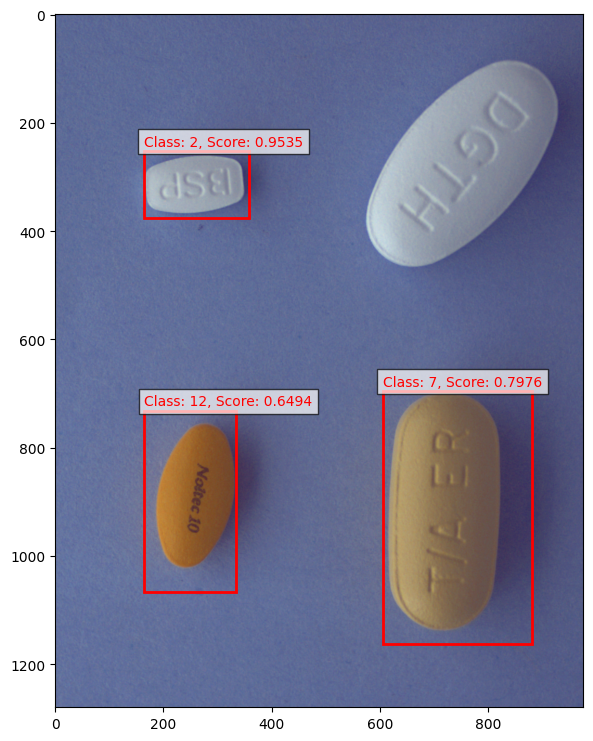

In [12]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.transforms import functional as F

# 테스트 이미지 시각화
def visualize_predictions(model, image_path, device, threshold=0.5):
    # 이미지 로드 및 전처리
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)
    
    # 모델 예측
    model.eval()
    with torch.no_grad():
        prediction = model(image_tensor)

    # 예측 결과 시각화
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)

    # 예측된 bounding box와 confidence score 가져오기
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']

    # confidence score가 threshold 이상인 것만 필터링
    for i in range(len(scores)):
        if scores[i] > threshold:
            box = boxes[i].cpu().numpy()
            label = labels[i].cpu().numpy()
            score = scores[i].cpu().numpy()

            # bounding box 그리기
            rect = patches.Rectangle(
                (box[0], box[1]), box[2] - box[0], box[3] - box[1], 
                linewidth=2, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)

            # 레이블과 score 출력
            ax.text(
                box[0], box[1] - 10, 
                f"Class: {label}, Score: {score:.4f}", 
                fontsize=10, color='red', 
                bbox=dict(facecolor='white', alpha=0.7)
            )

    plt.show()

# 예시로 테스트 이미지 경로 지정
test_image_path = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/test_images/1.png"

# 학습된 모델 불러오기
model_save_path = "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/notebooks/nb_models/faster_rcnn_model_ver1.pth"
model.load_state_dict(torch.load(model_save_path))
model = model.to(device)

# 테스트 이미지 시각화
visualize_predictions(model, test_image_path, device)

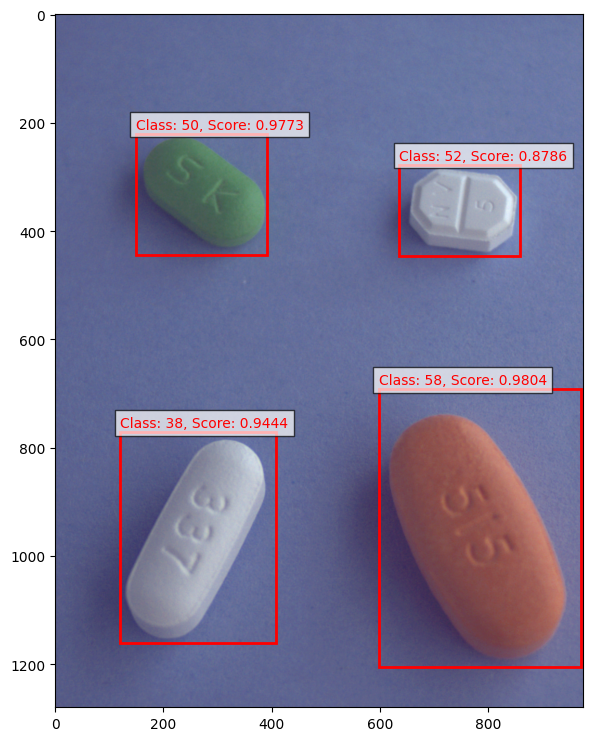

In [25]:
visualize_predictions(model, "C:/Users/jeaui/codeit/codeit-Al-Project/Project1/data/test_images/109.png", device)